# Create Plots of Different Aspects of the STT Geometry

## Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch
import numpy as np
import seaborn as sns

## Global Options

In [6]:
imagePath = "/home/nikin105/sciebo/Doktor/ML-Project/Images/stt_geometry/"
print("Images will be saved in", imagePath)

data: pd.DataFrame = pd.read_csv(
    "/home/nikin105/mlProject/data/detectorGeometries/tubePos.csv"
)
data.columns = data.columns.str.strip()

xMax = data["x"].max()
xMin = data["x"].min()

yMax = data["y"].max()
yMin = data["y"].min()


class HandlerEllipse(HandlerPatch):
    def create_artists(
        self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans
    ) -> list[Circle]:
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = Circle(xy=center, radius=0.8 * (height + ydescent))
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


# Set the general style of the plot using seaborn
sns.set_theme(color_codes=True)
colors = sns.color_palette("pastel")
sns.set_style("ticks")
sns.set_context("talk")

Images will be saved in /home/nikin105/sciebo/Doktor/ML-Project/Images/stt_geometry/


In [7]:
data.head()

,tubeID,layerID,sectorID,x,y,z,innerRadius,outerRadius,length,angle,skewed
0,1,0,0,-2.62406,17.675,35.0,0.5,0.501,150.0,0.0,0
1,2,0,0,-3.49874,17.170,35.0,0.5,0.501,150.0,0.0,0
2,3,0,0,-4.37343,16.665,35.0,0.5,0.501,150.0,0.0,0
3,4,0,0,-5.24811,16.160,35.0,0.5,0.501,150.0,0.0,0
4,5,0,0,-6.12280,15.655,35.0,0.5,0.501,150.0,0.0,0


## Straw Skewedness in the xy-Projection

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/stt_geometry/xyProjection_polarity.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/stt_geometry/xyProjection_polarity.pdf


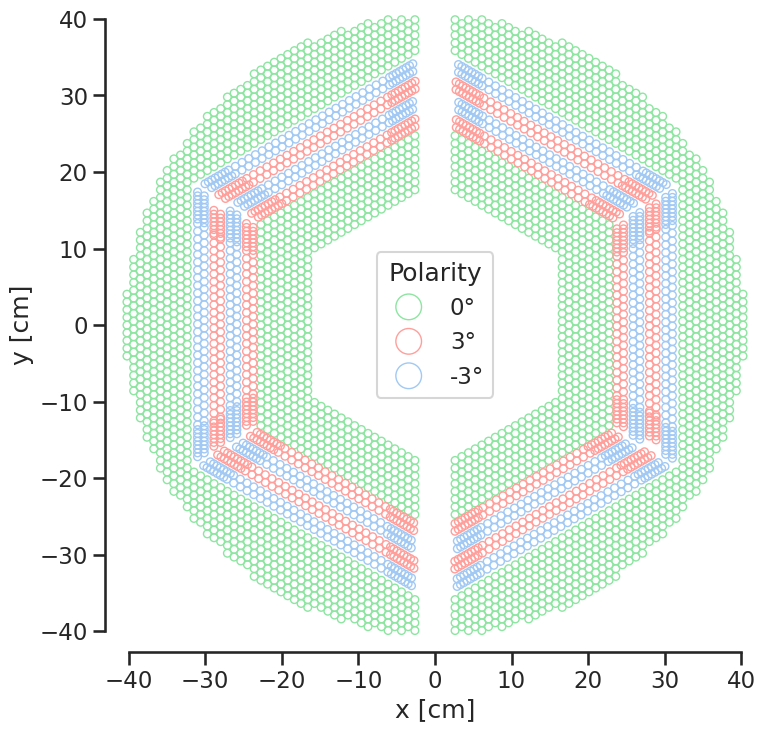

In [8]:
plt.close("all")

fig, ax = plt.subplots(figsize=(8, 8))

for index, row in data.iterrows():
    if row["skewed"] == 0:
        straightOuterTube = Circle(
            (row["x"], row["y"]), row["outerRadius"], ec=colors[2], fc="none", lw=1
        )
        ax.add_patch(straightOuterTube)
    elif np.sign(row["skewed"]) == 1:
        posSkewedOuterTube = Circle(
            (row["x"], row["y"]), row["outerRadius"], ec=colors[3], fc="none", lw=1
        )
        ax.add_patch(posSkewedOuterTube)
    elif np.sign(row["skewed"]) == -1:
        negSkewedOuterTube = Circle(
            (row["x"], row["y"]), row["outerRadius"], ec=colors[0], fc="none", lw=1
        )
        ax.add_patch(negSkewedOuterTube)
    else:
        raise Exception("Invalid skewed")

ax.set_xlim(xMin - 1, xMax + 1)
ax.set_xlabel("x [cm]")
ax.set_ylim(yMin - 1, yMax + 1)
ax.set_ylabel("y [cm]")

ax.set_aspect("equal")

ax.legend(
    [straightOuterTube, posSkewedOuterTube, negSkewedOuterTube],
    ["0°", "3°", "-3°"],
    handler_map={Circle: HandlerEllipse()},
    loc="center",
    title="Polarity",
)

sns.despine(offset=10, trim=True)
fig.tight_layout()

imgPath = imagePath + "xyProjection_polarity"

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

## Sectors in xy-Projection

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/stt_geometry/stt_xyProjection_sectors.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/stt_geometry/stt_xyProjection_sectors.pdf


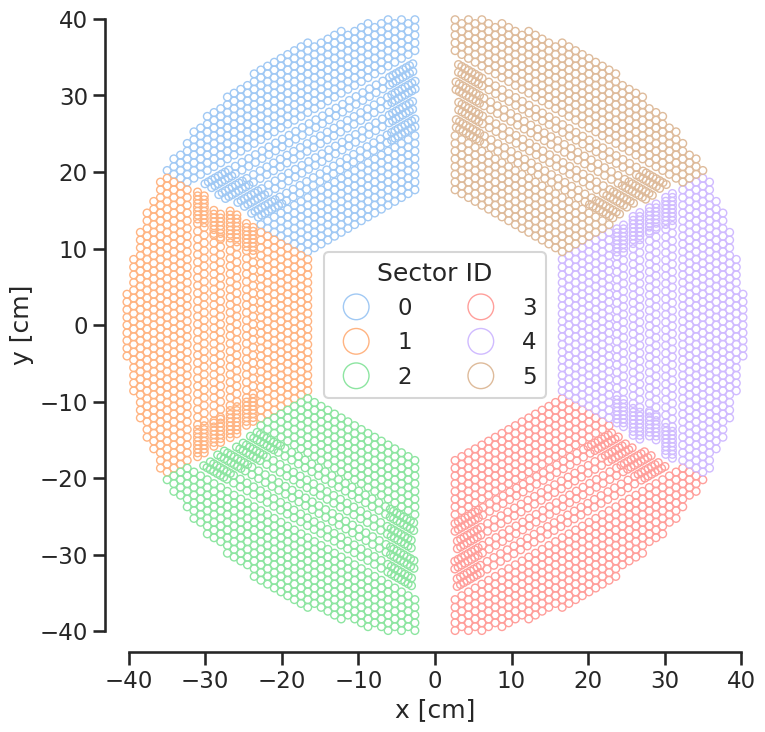

In [9]:
plt.close("all")

fig, ax = plt.subplots(figsize=(8, 8))

colors = sns.color_palette("pastel")

first_sector_tube = []
unique_sectors = []

for sector_id in data.sectorID.unique():
    sector_tube_num = 0
    for tube in data[data.sectorID == sector_id].itertuples():
        outer_tube = Circle(
            (tube.x, tube.y), tube.outerRadius, ec=colors[sector_id], fc="none", lw=1
        )
        ax.add_patch(outer_tube)
        if sector_tube_num == 0:
            first_sector_tube.append(outer_tube)
            unique_sectors.append(sector_id)
        sector_tube_num += 1

ax.set_xlim(xMin - 1, xMax + 1)
ax.set_xlabel("x [cm]")
ax.set_ylim(yMin - 1, yMax + 1)
ax.set_ylabel("y [cm]")

ax.set_aspect("equal")

plt.legend(
    first_sector_tube,
    unique_sectors,
    handler_map={Circle: HandlerEllipse()},
    loc="center",
    title="Sector ID",
    ncols=2,
)

sns.despine(offset=10, trim=True)
fig.tight_layout()

imgPath = imagePath + "stt_xyProjection_sectors"

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

## Layers in xy-Projection

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/stt_geometry/stt_xyProjection_layers.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/stt_geometry/stt_xyProjection_layers.pdf


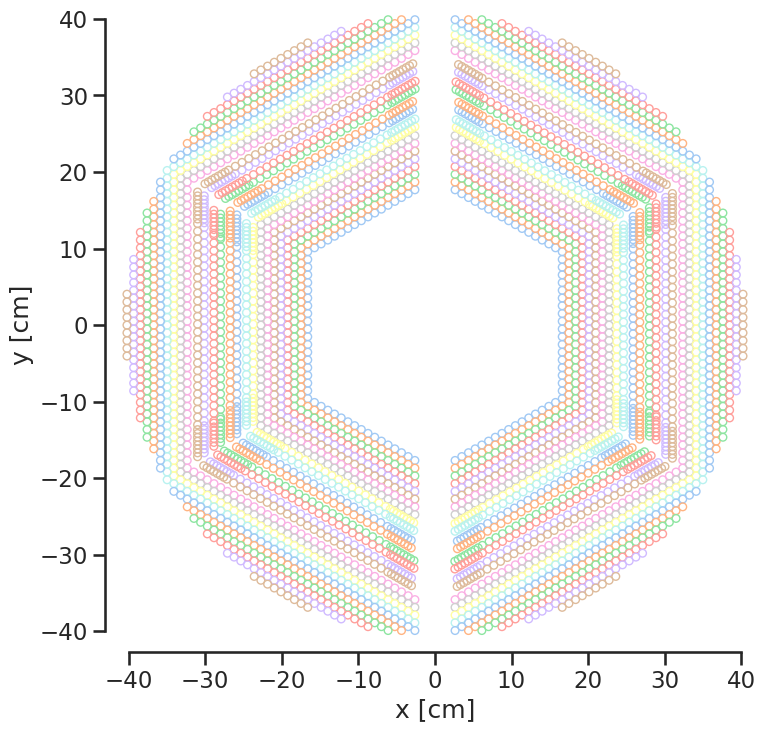

In [10]:
plt.close("all")

fig, ax = plt.subplots(figsize=(8, 8))

colors = (
    sns.color_palette("pastel")
    + sns.color_palette("pastel")
    + sns.color_palette("pastel")
)

for layer_id in data.layerID.unique():
    for tube in data[data.layerID == layer_id].itertuples():
        outer_tube = Circle(
            (tube.x, tube.y), tube.outerRadius, ec=colors[layer_id], fc="none", lw=1
        )
        ax.add_patch(outer_tube)

ax.set_xlim(xMin - 1, xMax + 1)
ax.set_xlabel("x [cm]")
ax.set_ylim(yMin - 1, yMax + 1)
ax.set_ylabel("y [cm]")

ax.set_aspect("equal")

sns.despine(offset=10, trim=True)
fig.tight_layout()

imgPath = imagePath + "stt_xyProjection_layers"

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")